# Visualizing multidimensional data

## Warm-up

### Histogram

(array([ 1.,  1.,  0.,  5.,  3.,  2.,  3., 10.,  4.,  4.,  9.,  9.,  6.,
         6.,  8.,  7.,  6.,  4.,  2.,  3.,  3.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  1.]),
 array([-2.08052702, -1.91822117, -1.75591533, -1.59360949, -1.43130364,
        -1.2689978 , -1.10669196, -0.94438611, -0.78208027, -0.61977443,
        -0.45746858, -0.29516274, -0.1328569 ,  0.02944895,  0.19175479,
         0.35406064,  0.51636648,  0.67867232,  0.84097817,  1.00328401,
         1.16558985,  1.3278957 ,  1.49020154,  1.65250738,  1.81481323,
         1.97711907,  2.13942491,  2.30173076,  2.4640366 ,  2.62634244,
         2.78864829]),
 <BarContainer object of 30 artists>)

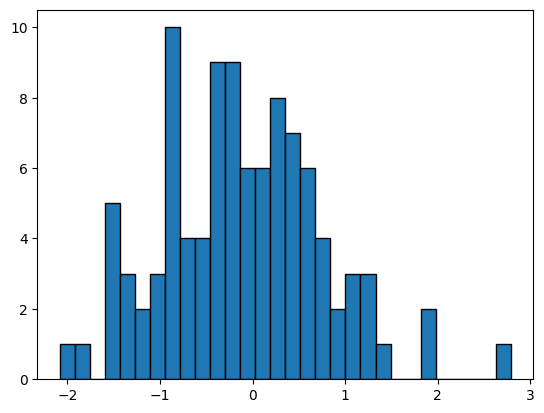

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Randomly generate data from a normal distribution
synthetic_data = np.random.normal(0, 1, 100)

plt.hist(synthetic_data, bins=30, edgecolor='black')

### QQ-plot

The qq-plot can be used to compare two distributions.
In it often helpful to check whether a sampled distribution is normal or not.

We will use the `statsmodels` library to visualize the qqplot.
The `qqplot` function is used to compare a given distribution to the real normal distribution.

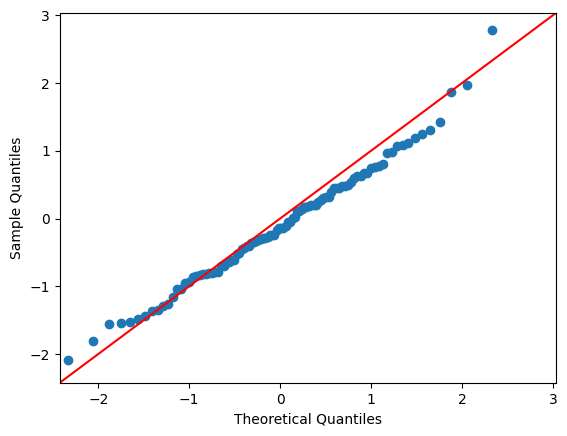

In [ ]:
#!pip install statsmodels
import statsmodels.api as sm

sm.qqplot(synthetic_data, line ='45')
plt.show()

See [here](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot_2samples.html) how to compare two sample distributions.

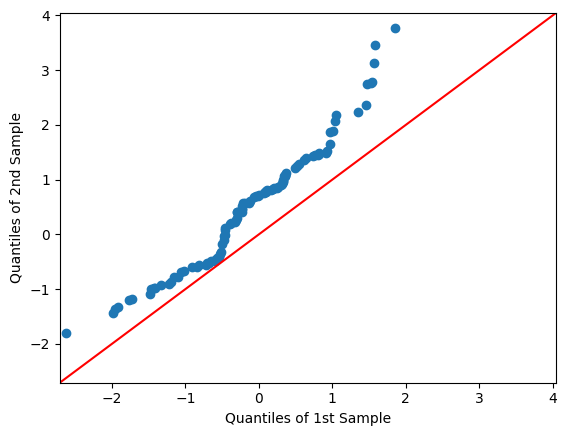

In [ ]:
# Generate two distributions and visualize the qq-plot between them.
from statsmodels.graphics import gofplots as gp

np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=0.5, scale=1.2, size=100)


fig = gp.qqplot_2samples(data1, data2, line='45')
plt.show()


### t-SNE

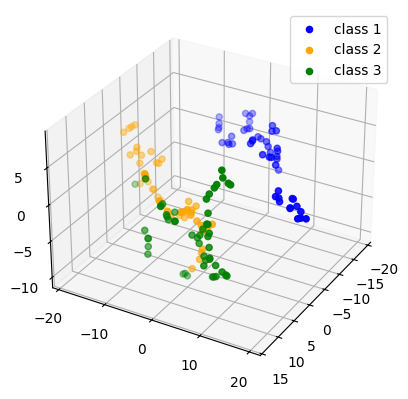

In [ ]:
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
labels = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

t_sne = TSNE(n_components=3,  #n_components is the dimension of the embedding space
    perplexity=4,
    early_exaggeration=6
)

Xtsne = t_sne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=30)
ax.scatter(Xtsne[labels==0,0], Xtsne[labels==0,1], Xtsne[labels==0,2], c='blue', label='class 1')
ax.scatter(Xtsne[labels==1,0], Xtsne[labels==1,1], Xtsne[labels==1,2], c='orange', label='class 2')
ax.scatter(Xtsne[labels==2,0], Xtsne[labels==2,1], Xtsne[labels==2,2], c='green', label='class 3')

ax.legend()
plt.show()

## The data

You will work with a dataset of customer information, including social-demographic data and spending information on different product categories.
You can download the dataset and see the description [here](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering).

### 1.&nbsp; Import and preprocess data
a) Some of the columns in the dataset are non-numeric.
Encode the data such that all columns contain numeric values.

For example, in the Education column, there are several education levels.
You can encode them: \\
Basic = 1 \\
2nd cycle = 2 \\
Graduation = 3 \\
... and so on

b) Also, remove the columns containing date information.

c) Remove NaN entries

d) Scale the data so PCA runs ok

In [ ]:
# Import the data
import pandas as pd
from  sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("customer_segmentation.csv")
data.head()

# Encode the non-numeric columns
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

data = pd.get_dummies(data, drop_first=True)

# Drop date columns
date_cols = [col for col in data.columns if 'date' in col.lower() or 'time' in col.lower()]
data = data.drop(columns=date_cols)


# Remove entries containing NaNs
data = data.dropna()

# Scale the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)





### 2.&nbsp; Plot some histograms

Plot the histograms for the following data features:
- Year_Birth
- Income
- MntWines
- MntFruits
- MntSweetProducts
- NumWebPurchases

Use subplots for a more compact view of the figures.

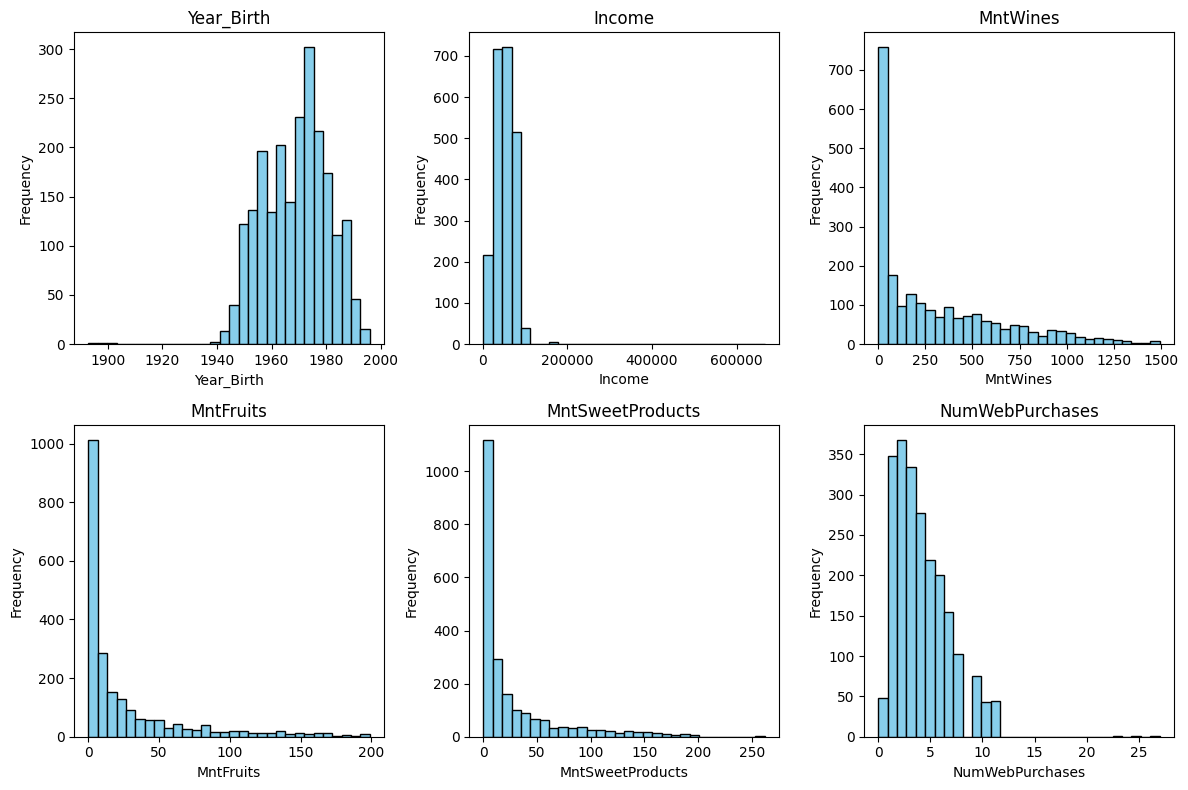

In [ ]:
import matplotlib.pyplot as plt

features = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntSweetProducts', 'NumWebPurchases']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3.&nbsp; Is the age normally distributed?
Use the qq plot to find out.

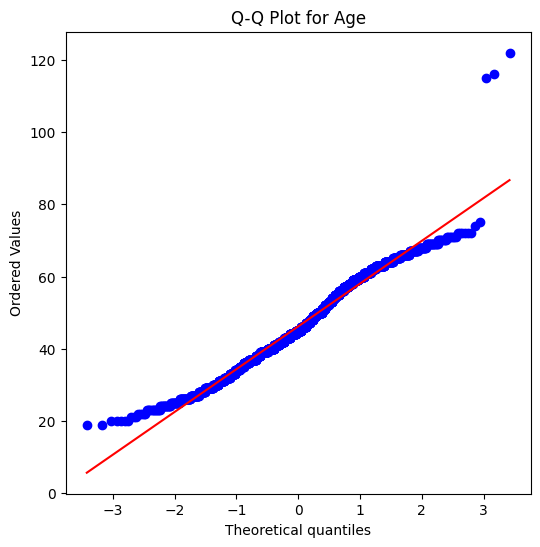

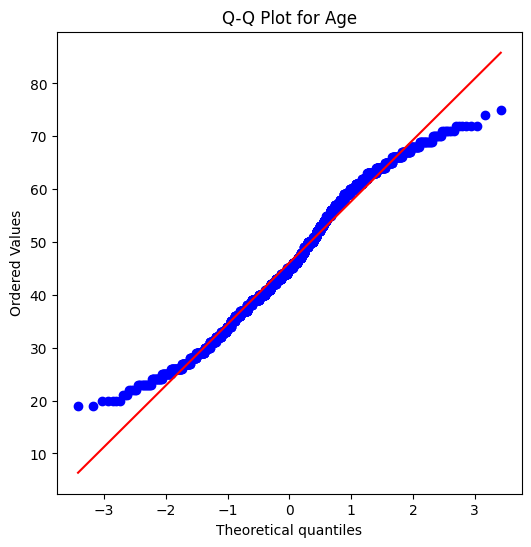

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

data['Age'] = 2015 - data['Year_Birth']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data['Age']))

# Set a threshold (commonly 3)
threshold = 3

# Filter out the outliers
data_no_outliers = data[z_scores < threshold]


# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Age")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data_no_outliers['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Age")
plt.show()

### 4.&nbsp; Is the income distribution more similar to the distribution of ammount spent on meat products?

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')


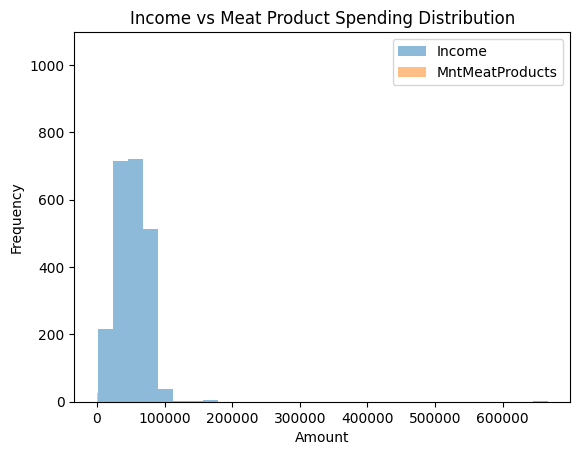

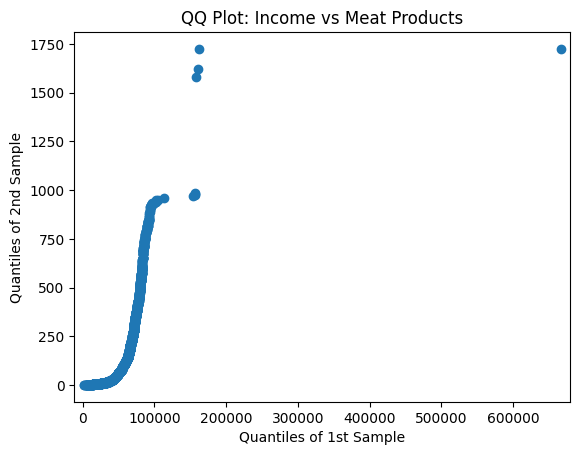

In [ ]:
import matplotlib.pyplot as plt
print(data.columns)


plt.hist(data['Income'], bins=30, alpha=0.5, label='Income')
plt.hist(data['MntMeatProducts'], bins=30, alpha=0.5, label='MntMeatProducts')
plt.legend()
plt.title('Income vs Meat Product Spending Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

import statsmodels.api as sm

sm.qqplot_2samples(data['Income'], data['MntMeatProducts'])
plt.title('QQ Plot: Income vs Meat Products')
plt.show()



### 5.&nbsp; Visualize the entire dataset using PCA

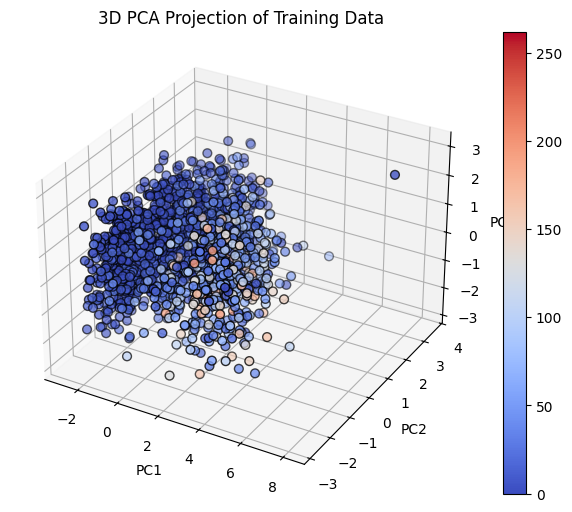

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2],
                     c=y_train, cmap='coolwarm', edgecolor='k', s=40)

ax.set_title('3D PCA Projection of Training Data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.colorbar(scatter)
plt.show()


### 6.&nbsp; Vizualize the entire dataset using t-SNE

Use the default values for the t-SNE hyperparameters

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


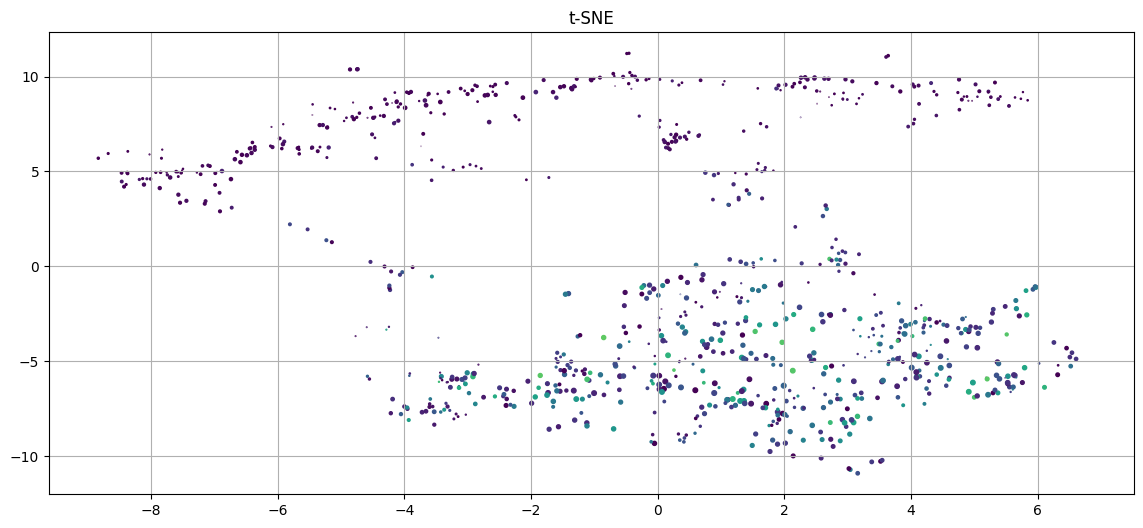

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


tsne = TSNE(n_components=3, learning_rate=200.0, perplexity=30, init='random', random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(14,6))
plt.title("t-SNE")
plt.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2],y_train[:])
plt.grid()

Adjust the hyperparameter values and rerun the t-SNE visualization.

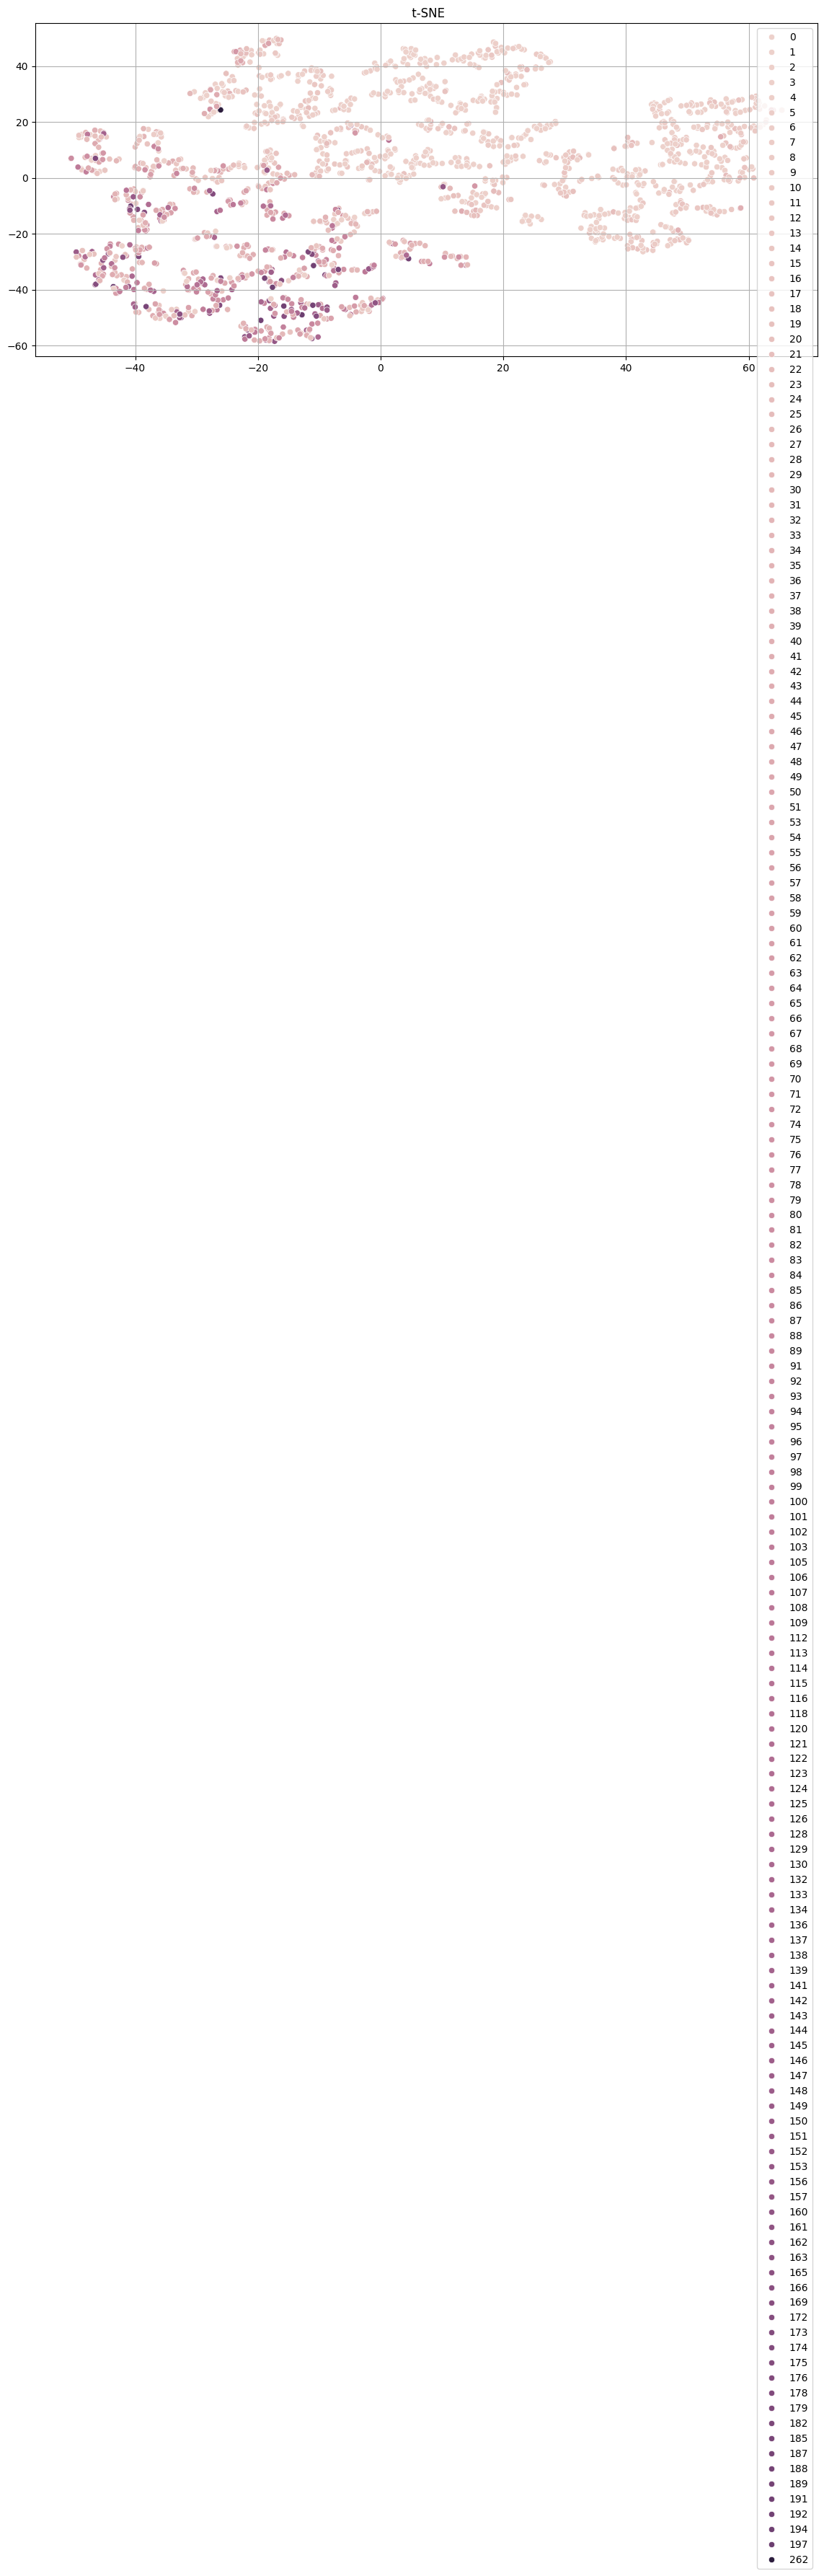

In [ ]:
tsne = TSNE(n_components=2, learning_rate=200.0, perplexity=20, early_exaggeration=12, init='random', random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_train)

#Specify the plot size in inches
plt.figure(figsize=(14,6))

#Title of the plot
plt.title(" t-SNE")

#Seaborn Scatterplot function
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train[:], legend='full')

plt.grid()